In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import PyComplexHeatmap as pch
import seaborn as sns

%matplotlib inline

import random
random.seed(42)
np.random.seed(42)

import warnings
warnings.filterwarnings('ignore')

In [3]:
fig_result_dir = '/Users/bzhao2/Library/CloudStorage/OneDrive-InsideMDAnderson/akdemirlab-projects/01_catalyst/scripts/figures/Fig5/Fig5.4/plots'

In [4]:
adata = sc.read_h5ad('/Users/bzhao2/Library/CloudStorage/OneDrive-InsideMDAnderson/akdemirlab-projects/01_catalyst/data/processed/xenium/WT_Mut_catalyst_proseg_prior_expan5um_raw_noBoundary_lowTranscriptLeidenClusterRemoved_Nov25_p46_neuronal_cells_removed.h5ad')
adata.obs['cell_type_final'] = adata.obs[[i for i in adata.obs.columns if 'usage' in i]].apply(lambda x: x.idxmax().split('_')[0] if x.max() > 0.1 else 'Underdetermined', axis=1)

wt_adata = adata[adata.obs['idh_2'].str.contains('WT')]

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Mut-Codel vs. WT: Mann-Whitney-Wilcoxon test two-sided, P_val:4.667e-02 U_stat=3.000e+01


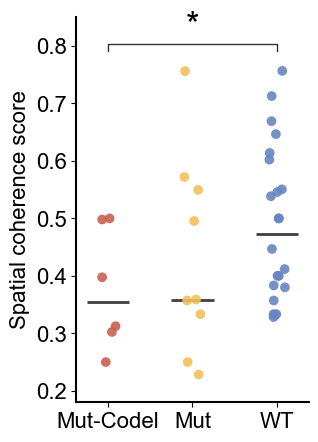

In [5]:
from statannotations.Annotator import Annotator

#### Figure 5D
coherence_scores_df = pd.read_csv('/Users/bzhao2/Library/CloudStorage/OneDrive-InsideMDAnderson/akdemirlab-projects/01_catalyst/scripts/pipelines/xenium/local/figures/figure_scripts/xenium_coherence_score.csv', index_col=0)
coherence_scores_df['idh'] = coherence_scores_df.index.map(adata.obs[['sample_2', 'idh_2']].drop_duplicates().set_index('sample_2')['idh_2'])
coherence_scores_df['idh'] = np.where(coherence_scores_df['idh'].str.contains('WT'), 'WT', coherence_scores_df['idh'])
coherence_scores_df['idh'] = pd.Categorical(coherence_scores_df['idh'], categories=['Mut-Codel', 'Mut', 'WT'], ordered=True)

idh_colors = {'Mut-Codel':'#C86050', 'Mut':'#F3BF5A', 'WT':'#6685c2'}
plt.rcParams.update({'font.family': 'Arial', 'font.size': 16})
fig, ax = plt.subplots(figsize=(3, 5))
sns.boxplot(x='idh', y='coherence_score', data=coherence_scores_df, width=0.5, showfliers=False, showcaps=False, whiskerprops={'visible': False}, boxprops={'visible': False}, medianprops={'linewidth': 2})
sns.stripplot(x='idh', y='coherence_score', data=coherence_scores_df, hue='idh', dodge=False, legend=False, size=7, alpha=0.9, palette=idh_colors)
# Add significance annotations for all pairs
box_pairs = [(("Mut-Codel", "Mut")), 
             (("Mut-Codel", "WT")),
             (("Mut", "WT"))]

annotator = Annotator(ax, pairs=box_pairs, data=coherence_scores_df, x='idh', y='coherence_score')
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', verbose=2, line_width=1, hide_non_significant=True, 
                    fontsize=25)
annotator.apply_and_annotate()


plt.ylabel('Spatial coherence score')
plt.xlabel('')
plt.ylim(0.18, 0.85)
# plt.legend(title='IDH status', loc='upper right', frameon=False)
sns.despine()
# Set spine line width
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
fig.savefig(f'{fig_result_dir}/Figure5D.png', dpi=300, bbox_inches='tight')
plt.show()


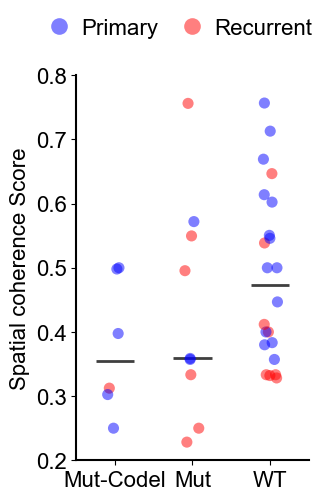

In [20]:
## 
coherence_scores_df['tissue_type'] = np.where(coherence_scores_df.index.str.contains('R'), 'Recurrent', 'Primary')
fig, ax = plt.subplots(figsize=(3, 5))
sns.boxplot(x='idh', y='coherence_score', data=coherence_scores_df, width=0.5, showfliers=False, showcaps=False, whiskerprops={'visible': False}, boxprops={'visible': False}, medianprops={'linewidth': 2}, ax=ax)
sns.stripplot(x='idh', y='coherence_score', hue='tissue_type', data=coherence_scores_df, palette={'Primary': 'blue', 'Recurrent': 'red'}, dodge=False, size=8,alpha=0.5, ax=ax)
plt.ylabel('Spatial coherence Score')
plt.xlabel('')
plt.ylim(0.2, 0.8)
plt.legend(title='', frameon=False, bbox_to_anchor=(1.1, 1.2), 
            handletextpad=0,  
                       # Vertical spacing between legend entries
            labelspacing=0,
            columnspacing=0.5,
            markerscale=1.5,
           ncols=2)
sns.despine()
# Set spine line width
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
fig.savefig(f'{fig_result_dir}/Figure5D_primary_recurrent.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
adata = sc.read_h5ad('/Users/bzhao2/Library/CloudStorage/OneDrive-InsideMDAnderson/akdemirlab-projects/01_catalyst/data/processed/xenium/WT_Mut_catalyst_proseg_prior_expan5um_raw_noBoundary_lowTranscriptLeidenClusterRemoved_Nov25_p46_neuronal_cells_removed.h5ad')
adata.obs['cell_type_final'] = adata.obs[[i for i in adata.obs.columns if 'usage' in i]].apply(lambda x: x.idxmax().split('_')[0] if x.max() > 0.1 else 'Underdetermined', axis=1)
wt_adata = sc.read_h5ad('/Users/bzhao2/Library/CloudStorage/OneDrive-InsideMDAnderson/akdemirlab-projects/01_catalyst/scripts/figures/Fig6/Fig6.1/data/wt_adata_p52P_filtered.h5ad')
plot_dir = '/Users/bzhao2/Library/CloudStorage/OneDrive-InsideMDAnderson/akdemirlab-projects/01_catalyst/scripts/figures/Fig5/Fig5.5/plots'
line_width = 1.5

In [ ]:
cell_type_colors = {
        'AC-like': "#92B0C6", #(soft sky blue)
        'OPC-like': "#F1A340", #(desaturated blue-gray)
        'Myeloid': "#D3A5C8", #(muted mauve)
        'MES-like': "#D9735A", #(burnt coral for stronger contrast)
        'Oligodendrocyte': "#9F5F80", #(muted plum to distinguish from MES-like)
        'Pericyte': "#B0408A", #(soft mustard yellow)
        'Cycling': "#A69AB2", # (muted lavender)
        'Endothelial': "#DD51AD", # (pale mint green)
        'Excitatory neuron': "#D6D2C4", #(muted beige)
        'T cell': "#89A970", #(soft olive green)
        'Inhibitory neuron': "#656565", # (medium gray)
        # 'Other': "#808080"  # Gray for 'Other'
    }

#### Figure 5E
import gzip 
import geopandas as gpd

def plot_samples(sample, bbox=None, figsize=10, legend=False, savefig=False, with_title=False):
    
    ''' 
    bboxes: list of bbox [xmin, xmax, ymin, ymax]
    '''

    samples_matching_dict = adata.obs[['sample', 'sample_2']].drop_duplicates('sample').set_index('sample_2').to_dict()['sample']
    proseg_dir = '/Users/bzhao2/Library/CloudStorage/OneDrive-InsideMDAnderson/akdemirlab-projects/01_catalyst/data/processed/xenium/expan5um/proseg'
    with gzip.open(f'{proseg_dir}/{samples_matching_dict[sample]}/cell-polygons.geojson.gz', 'rb') as f:
        gdf = gpd.read_file(f)
    gdf['cell'] = gdf['cell'].astype('str')
    gdf['cell_id'] = [sample+'_'+x for x in gdf['cell']]
    tmp_adata = adata[adata.obs['sample_2']==sample]
    gdf = gdf.merge(tmp_adata.obs.reset_index(), on='cell_id', how='inner')
    gdf['color'] = gdf['cell_type_final'].map(cell_type_colors)

    fig, ax = plt.subplots(figsize=(figsize, figsize))
    gdf.plot(column='cell_type_final', legend=False, aspect=1, color=gdf['color'], ax=ax)
    if bbox is not None:
        ax.set_xlim(bbox[0], bbox[1])
        ax.set_ylim(bbox[2], bbox[3])

    if legend:
        # Create custom legend with dots
        handles, labels = [], []
        for cell_type, color in cell_type_colors.items():
            handles.append(mpl.lines.Line2D([0], [0], marker='o', markerfacecolor=color, markersize=15, label=cell_type, markeredgewidth=0, linestyle='None', markeredgecolor='none'))
            labels.append(cell_type)
        ax.legend(handles=handles, bbox_to_anchor=(1.5, 1), frameon=False,
              handletextpad=2,  # Increase space between marker and text
              borderpad=1.5,     # Add space inside the legend box
              markerscale=0.8)  # Adjust marker size within legend
 
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])  
    ax.set_yticks([])
    ax.invert_yaxis()
    fig = ax.get_figure()
    if with_title:
        ax.set_title(sample)
    if savefig:
        fig.savefig(f'{plot_dir}/Figure5E_{sample}_proseg.png', dpi=800, bbox_inches='tight')
    plt.show()

# Set the plot style
plt.style.use('dark_background')
plot_samples('p02P', bbox=[4000, 5000, 15400, 16400], savefig=True)
plot_samples('p44P',bbox=[2600, 3600, 1400, 2400], savefig=True)
# plot_samples('p46P')
# plot_samples('p63P')
plot_samples('p65R1', savefig=True)